<a href="https://colab.research.google.com/github/nsharma73/capstone_haystack/blob/main/Capstone_Project_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - GA Real Estate - Clustering**

*By Liliya Lopez*

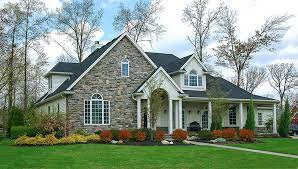

## **1.Introduction**

#####**Libraries used**

In [ ]:
#!pip install geopandas

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt 
import seaborn as sns 
import io
import json
import descartes
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import folium

##### **Import datasets**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
completed_data = pd.read_csv('drive/MyDrive/Colab Notebooks/clean_data_zil_tax.csv', index_col=0)
pd.set_option('display.max_columns', 20)
completed_data.head()

,zpid,rentZestimate,zestimate,livingArea,bathrooms,bedrooms,yearBuilt,address,city,state,...,Student_loan_ded,RE_taxes,PP_taxes,Child_credit,Earned_Inc_credit,NOI,Expenses,cap_rate,total_appliances,total_community_feat
0,2064281489,2175.41,347514.00,2103.0,2.0,4.0,2020.0,101 College Street,Kingsland,Georgia,...,1.067021,3.122857,0.676744,2.125743,2.585463,26104.92,8626.621200,0.051422,7.0,3.0
2,91030716,2600.00,325200.00,2269.0,3.0,5.0,2004.0,169 School House Creek Drive,Saint Marys,Georgia,...,1.004819,4.105556,0.758537,2.175097,2.555497,31200.00,9426.960000,0.070236,4.0,2.0
4,111242225,1999.00,340500.00,1846.0,2.0,3.0,2004.0,1621 Sandpiper Court,Saint Marys,Georgia,...,1.004819,4.105556,0.758537,2.175097,2.555497,23988.00,8134.500000,0.050329,10.0,6.0
6,2090936200,1999.00,326164.00,1953.0,2.0,3.0,2018.0,346 Laurel Landing Boulevard,Kingsland,Georgia,...,1.067021,3.122857,0.676744,2.125743,2.585463,23988.00,7994.007200,0.051594,NaN,NaN
8,2064330080,1939.51,365974.43,1835.0,2.0,3.0,2022.0,81 Ossabaw Way,Waverly,Georgia,...,1.160000,4.311111,0.400000,1.936000,2.294118,23274.12,8241.373414,0.040640,4.0,7.0


In [ ]:
sum(completed_data.duplicated())

0

In [ ]:
completed_data.isnull().sum(axis=0)

zpid                        0
rentZestimate               0
zestimate                   0
livingArea                  0
bathrooms                   0
bedrooms                    0
yearBuilt                   0
address                     0
city                        0
state                       0
zip                         0
latitude                    0
longitude                   0
square_footage              0
price_y                     0
census_county_name          0
beds                        0
baths_full                  0
year_built                  1
propertyTaxRate             0
pricePerSquareFoot        467
propertyTypeDimension       3
taxAnnualAmount             0
dateSold                  582
pageViewCount               4
hasAttachedProperty         3
poolFeatures             3029
flooring                  610
hasGarage                   3
parking                     3
hasWaterfrontView        4120
lotSize                   325
appliances                476
communityF

In [ ]:
completed_data.shape

(4599, 55)

In [ ]:
completed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4599 entries, 0 to 6515
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   zpid                   4599 non-null   int64  
 1   rentZestimate          4599 non-null   float64
 2   zestimate              4599 non-null   float64
 3   livingArea             4599 non-null   float64
 4   bathrooms              4599 non-null   float64
 5   bedrooms               4599 non-null   float64
 6   yearBuilt              4599 non-null   float64
 7   address                4599 non-null   object 
 8   city                   4599 non-null   object 
 9   state                  4599 non-null   object 
 10  zip                    4599 non-null   int64  
 11  latitude               4599 non-null   float64
 12  longitude              4599 non-null   float64
 13  square_footage         4599 non-null   int64  
 14  price_y                4599 non-null   int64  
 15  cens

In [ ]:
georgia_map = gpd.read_file('drive/MyDrive/Colab Notebooks/Georgia_State_Boundary/Georgia_State_Boundary.shp')

## **2.Exploratory Data Analysis**

#####**Distribution of numeric features**

In [ ]:
num_features = completed_data.select_dtypes(include=['int64','float64'])
num_features.head()

,zpid,rentZestimate,zestimate,livingArea,bathrooms,bedrooms,yearBuilt,zip,latitude,longitude,...,Student_loan_ded,RE_taxes,PP_taxes,Child_credit,Earned_Inc_credit,NOI,Expenses,cap_rate,total_appliances,total_community_feat
0,2064281489,2175.41,347514.00,2103.0,2.0,4.0,2020.0,31548,30.804209,-81.653325,...,1.067021,3.122857,0.676744,2.125743,2.585463,26104.92,8626.621200,0.051422,7.0,3.0
2,91030716,2600.00,325200.00,2269.0,3.0,5.0,2004.0,31558,30.767365,-81.588272,...,1.004819,4.105556,0.758537,2.175097,2.555497,31200.00,9426.960000,0.070236,4.0,2.0
4,111242225,1999.00,340500.00,1846.0,2.0,3.0,2004.0,31558,30.746731,-81.633995,...,1.004819,4.105556,0.758537,2.175097,2.555497,23988.00,8134.500000,0.050329,10.0,6.0
6,2090936200,1999.00,326164.00,1953.0,2.0,3.0,2018.0,31548,30.791878,-81.676750,...,1.067021,3.122857,0.676744,2.125743,2.585463,23988.00,7994.007200,0.051594,NaN,NaN
8,2064330080,1939.51,365974.43,1835.0,2.0,3.0,2022.0,31565,31.104492,-81.604486,...,1.160000,4.311111,0.400000,1.936000,2.294118,23274.12,8241.373414,0.040640,4.0,7.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec54587e10>,
      dtype=object)

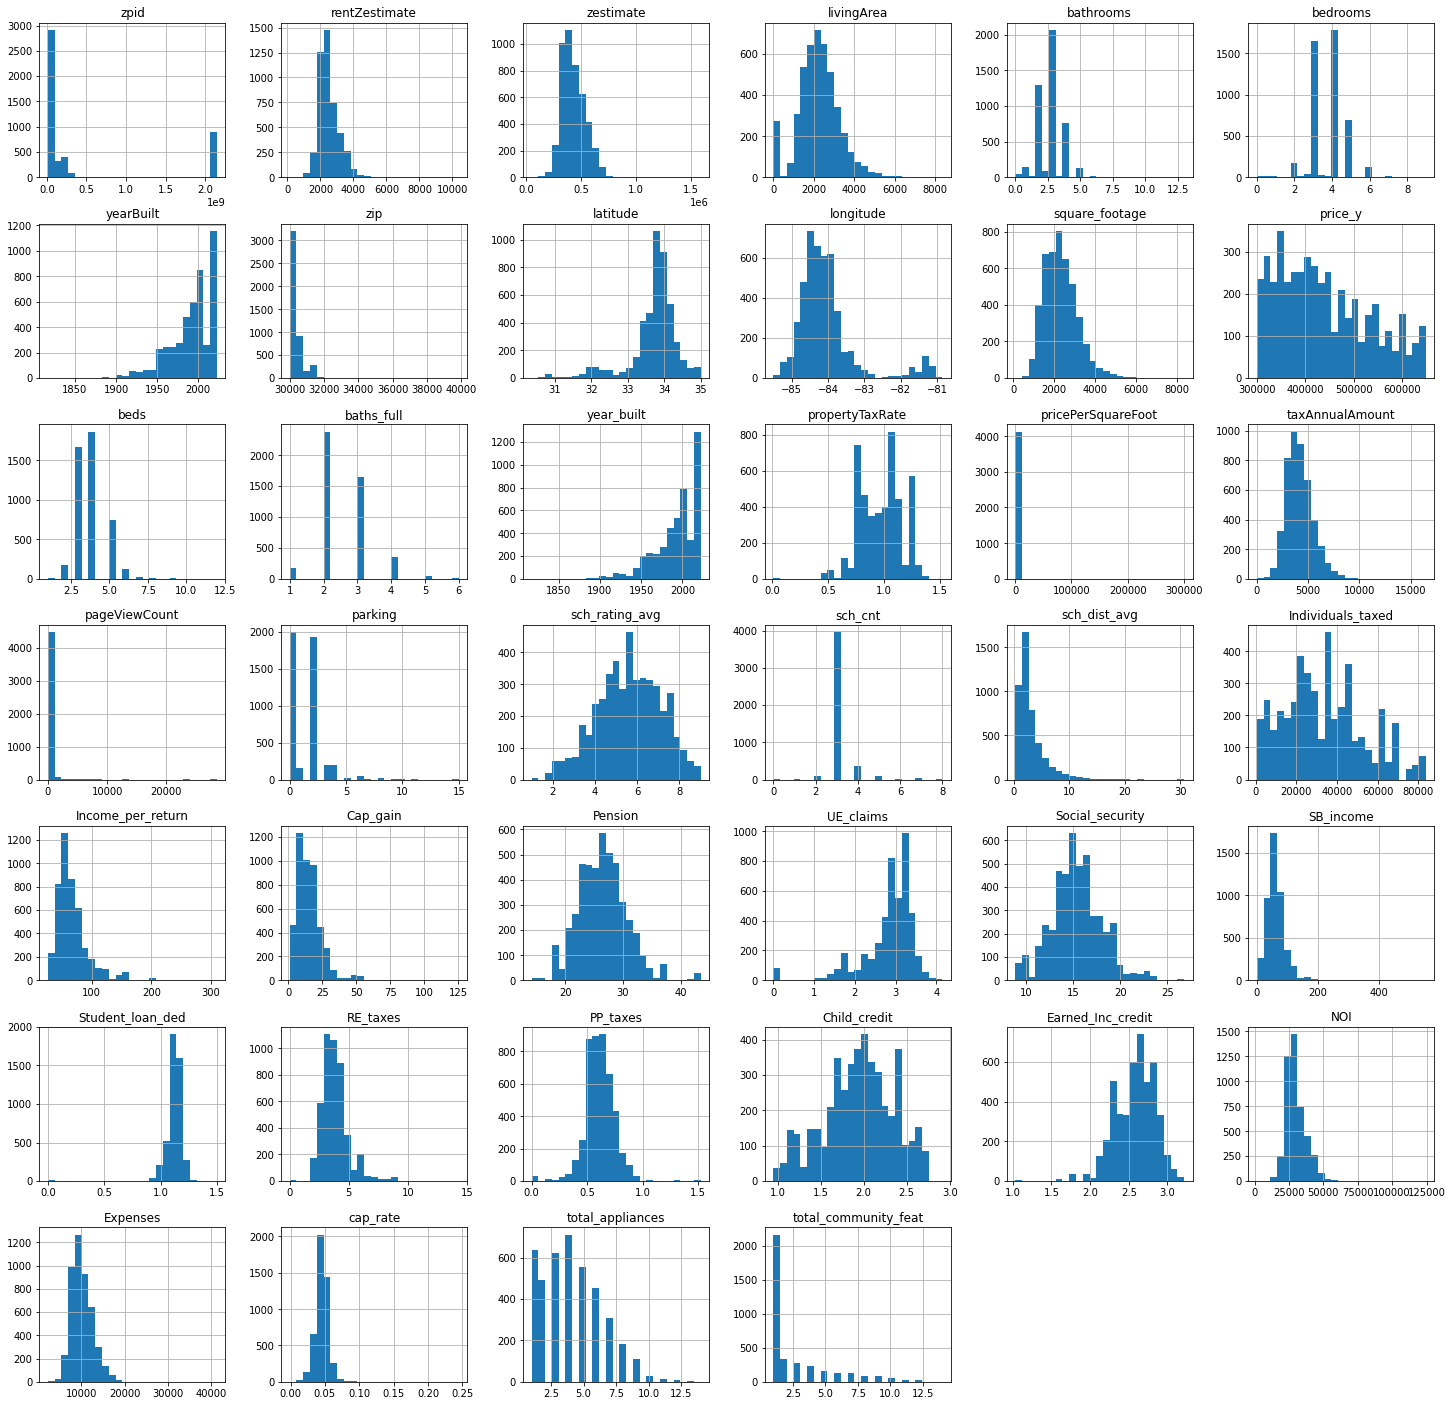

In [ ]:
num_features.hist(bins=25, figsize=(25,25))

#####**Correlarion Matrix**

In [ ]:
completed_data.corr().style.background_gradient()

,zpid,rentZestimate,zestimate,livingArea,bathrooms,bedrooms,yearBuilt,zip,latitude,longitude,square_footage,price_y,beds,baths_full,year_built,propertyTaxRate,pricePerSquareFoot,taxAnnualAmount,pageViewCount,parking,sch_rating_avg,sch_cnt,sch_dist_avg,Individuals_taxed,Income_per_return,Cap_gain,Pension,UE_claims,Social_security,SB_income,Student_loan_ded,RE_taxes,PP_taxes,Child_credit,Earned_Inc_credit,NOI,Expenses,cap_rate,total_appliances,total_community_feat
zpid,1.000000,-0.021560,0.034676,0.008285,0.049449,0.024852,0.423153,0.140978,-0.116806,0.132269,0.080574,0.090574,0.070770,0.088699,0.436324,-0.059505,0.012847,-0.004086,-0.048215,-0.055898,0.061881,0.076491,0.154051,-0.156725,-0.054418,-0.042006,0.046588,-0.118222,-0.013087,-0.009042,-0.113465,-0.066042,0.027560,0.066524,0.048625,-0.021560,-0.014794,-0.107578,0.133164,0.134681
rentZestimate,-0.021560,1.000000,0.779355,0.513436,0.518111,0.441567,0.163650,0.018489,-0.045616,0.025354,0.556933,0.641678,0.397631,0.450296,0.129690,0.026605,0.008344,0.644993,0.015414,0.080766,0.137995,-0.062226,-0.023431,0.045465,0.247670,0.191240,0.162607,0.117107,0.218044,0.176563,0.042158,0.248257,-0.019228,0.160530,-0.159149,1.000000,0.919912,0.509214,0.235786,0.201864
zestimate,0.034676,0.779355,1.000000,0.437287,0.463346,0.343216,0.223714,-0.040384,0.064751,-0.007671,0.481457,0.795307,0.278321,0.379471,0.182056,-0.044017,0.007894,0.776639,-0.018905,0.117123,0.249969,-0.051335,-0.029315,0.100269,0.320881,0.226077,0.194443,0.126460,0.296163,0.198600,0.027980,0.303110,-0.066174,0.252894,-0.253029,0.779355,0.857514,0.024875,0.301034,0.305355
livingArea,0.008285,0.513436,0.437287,1.000000,0.535113,0.493175,0.209091,0.040493,-0.116474,0.056827,0.668411,0.371602,0.447843,0.457504,0.175678,0.031988,-0.090254,0.371475,0.019599,0.127567,0.119778,-0.026373,0.006395,0.050416,0.019188,0.026092,0.068222,0.024984,0.068414,0.043747,-0.041459,-0.002908,0.061726,0.101665,0.015209,0.513436,0.493001,0.213560,0.194658,0.119728
bathrooms,0.049449,0.518111,0.463346,0.535113,1.000000,0.642313,0.336128,-0.000912,-0.053116,0.012736,0.580395,0.350997,0.513269,0.668160,0.269318,0.033861,-0.009171,0.392194,0.024473,0.139158,0.119648,-0.031224,-0.027649,0.081363,0.021033,0.013977,0.062503,0.059647,0.070122,0.040585,-0.029170,0.013515,0.076805,0.090520,0.000035,0.518111,0.506386,0.231762,0.205559,0.140672
bedrooms,0.024852,0.441567,0.343216,0.493175,0.642313,1.000000,0.229024,-0.021347,-0.076640,0.007537,0.542795,0.234053,0.836243,0.542013,0.171497,0.089126,0.004503,0.333282,0.000986,0.117802,0.066689,-0.057365,-0.068925,0.101441,-0.018635,-0.026008,0.008376,0.098268,0.012559,0.025109,0.003724,-0.014802,0.115134,0.052638,0.043774,0.441567,0.431076,0.269435,0.121532,0.068483
yearBuilt,0.423153,0.163650,0.223714,0.209091,0.336128,0.229024,1.000000,0.037742,-0.035017,0.074549,0.268098,0.122009,0.190522,0.234983,0.942076,-0.093580,0.026049,0.117756,-0.048592,0.032000,0.249479,0.028113,0.178068,0.056575,-0.013803,-0.072549,0.064032,-0.026276,0.082979,-0.022142,-0.159467,-0.089622,0.143775,0.267039,-0.037680,0.163650,0.156805,0.064039,0.178922,0.189171
zip,0.140978,0.018489,-0.040384,0.040493,-0.000912,-0.021347,0.037742,1.000000,-0.535661,0.501585,0.039771,-0.013211,-0.010759,0.026169,0.042116,-0.070764,0.021399,-0.078011,-0.012967,-0.136569,-0.108067,0.072912,0.244914,-0.376163,-0.078536,0.044918,0.098105,-0.254700,-0.039778,-0.009653,-0.243072,-0.063784,-0.075808,-0.065356,0.074399,0.018489,-0.029140,0.059987,0.130295,0.016489
latitude,-0.116806,-0.045616,0.064751,-0.116474,-0.053116,-0.076640,-0.035017,-0.535661,1.000000,-0.631368,-0.131991,0.086965,-0.091181,-0.051567,-0.035729,-0.236355,-0.008525,-0.087223,0.029236,0.117282,0.156265,0.026385,-0.108304,0.189611,0.106627,0.019978,-0.064016,-0.100572,0.137062,0.016864,-0.038487,0.089584,-0.249027,0.106060,-0.240540,-0.045616,-0.071622,-0.113518,-0.111668,-0.040622
longitude,0.132269,0.025354,-0.007671,0.056827,0.012736,0.007537,0.074549,0.501585,-0.631368,1.000000,0.0

##### **Geo Analysis**

In [ ]:
completed_data.city.value_counts()

Atlanta          412
Marietta         157
Lawrenceville    151
Loganville       110
Dallas           108
                ... 
Evans              1
Powder             1
Culloden           1
Forest Park        1
Danville           1
Name: city, Length: 325, dtype: int64

In [ ]:
df_cities = completed_data.groupby('city').filter(lambda x: len(x) > 20)

In [ ]:
df_cities.city.value_counts()

Atlanta          412
Marietta         157
Lawrenceville    151
Loganville       110
Dallas           108
                ... 
Dahlonega         22
Bethlehem         22
Lithonia          21
Jonesboro         21
Austell           21
Name: city, Length: 64, dtype: int64

Text(0.5, 1.0, 'Average Zestimate Price per City in Georgia')

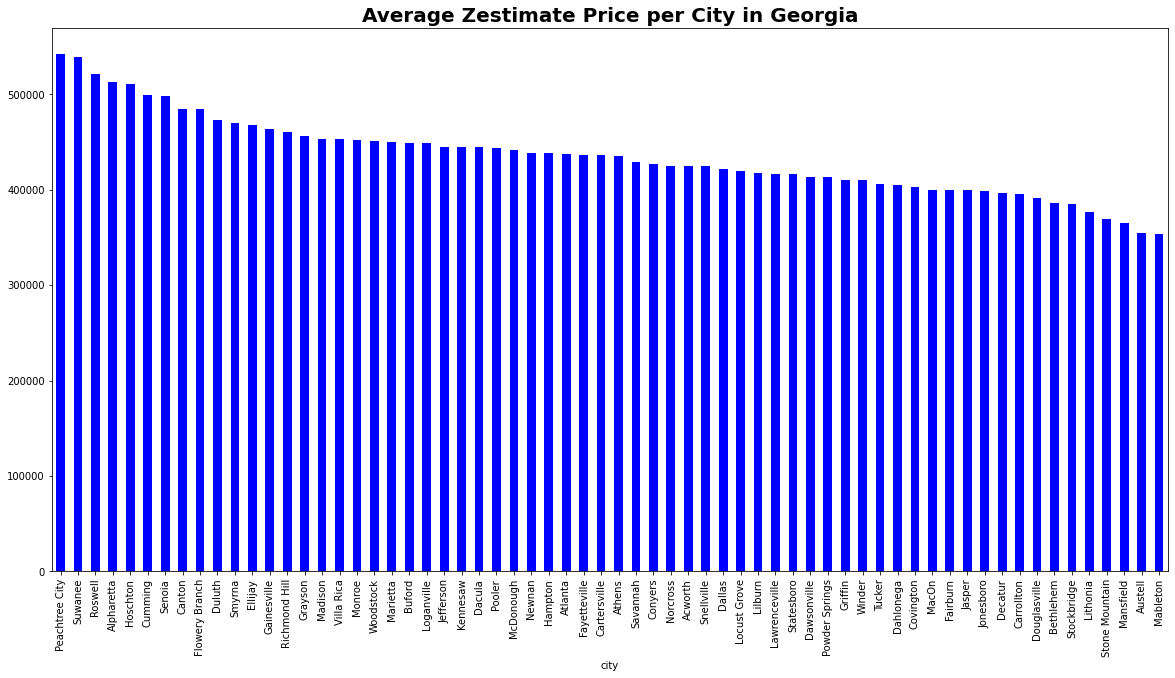

In [ ]:
plt.figure(figsize = (20,10))
df_cities.groupby('city')['zestimate'].agg('mean').sort_values(ascending=False).plot.bar(color='blue')
plt.title("Average Zestimate Price per City in Georgia", fontweight="bold", size=20)

Text(0.5, 1.0, 'Average rentZestimate Price per City in Georgia')

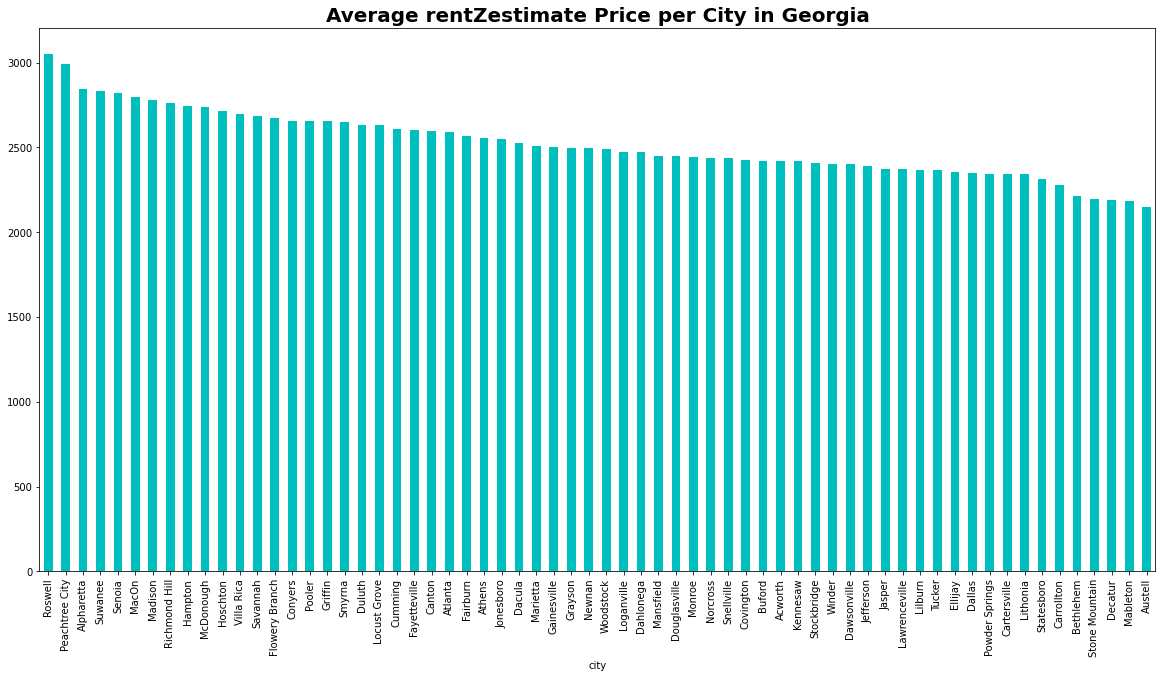

In [ ]:
plt.figure(figsize = (20,10))
df_cities.groupby('city')['rentZestimate'].agg('mean').sort_values(ascending=False).plot.bar(color ='c')
plt.title("Average rentZestimate Price per City in Georgia", fontweight="bold", size=20)

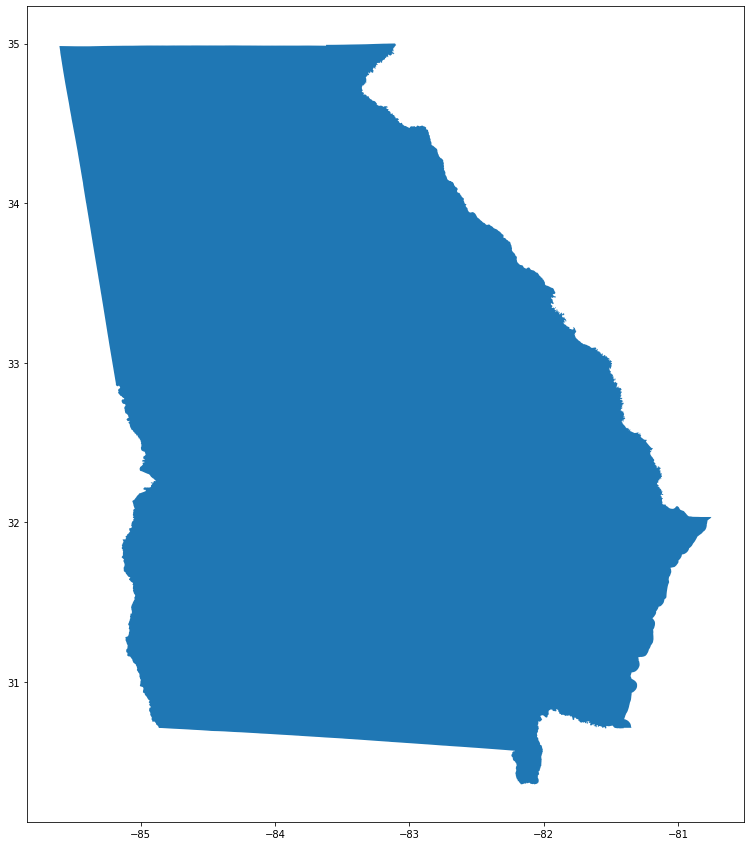

In [ ]:
fig,ax = plt.subplots(figsize =(15,15))
georgia_map.plot(ax = ax)

In [ ]:
df = completed_data[['zestimate', 'rentZestimate', 'address', 'city', 'zip','latitude', 'longitude']]
crs = {'init':'epsg:4326'}
df.head()

,zestimate,rentZestimate,address,city,zip,latitude,longitude
0,347514.00,2175.41,101 College Street,Kingsland,31548,30.804209,-81.653325
2,325200.00,2600.00,169 School House Creek Drive,Saint Marys,31558,30.767365,-81.588272
4,340500.00,1999.00,1621 Sandpiper Court,Saint Marys,31558,30.746731,-81.633995
6,326164.00,1999.00,346 Laurel Landing Boulevard,Kingsland,31548,30.791878,-81.676750
8,365974.43,1939.51,81 Ossabaw Way,Waverly,31565,31.104492,-81.604486


In [ ]:
geometry = [Point(xy) for xy in zip (df['longitude'], df['latitude'])]
geometry[:3]

In [ ]:
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
geo_df.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,zestimate,rentZestimate,address,city,zip,latitude,longitude,geometry
0,347514.00,2175.41,101 College Street,Kingsland,31548,30.804209,-81.653325,POINT (-81.65332 30.80421)
2,325200.00,2600.00,169 School House Creek Drive,Saint Marys,31558,30.767365,-81.588272,POINT (-81.58827 30.76737)
4,340500.00,1999.00,1621 Sandpiper Court,Saint Marys,31558,30.746731,-81.633995,POINT (-81.63399 30.74673)
6,326164.00,1999.00,346 Laurel Landing Boulevard,Kingsland,31548,30.791878,-81.676750,POINT (-81.67675 30.79188)
8,365974.43,1939.51,81 Ossabaw Way,Waverly,31565,31.104492,-81.604486,POINT (-81.60449 31.10449)


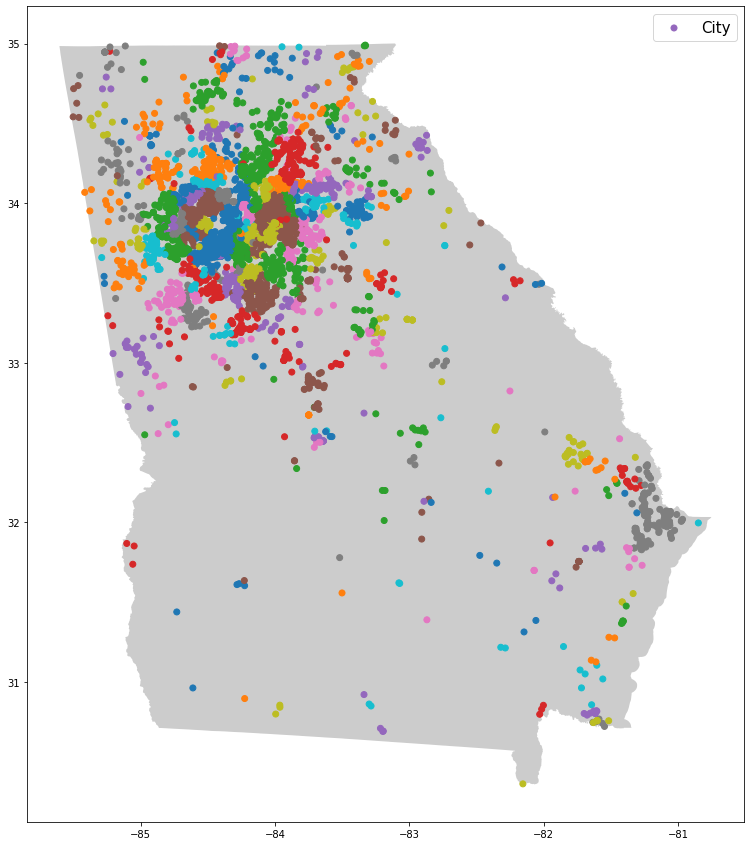

In [ ]:
fig,ax = plt.subplots(figsize =(15,15))
georgia_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_df.plot(column = 'city', ax=ax, categorical = True, legend = True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
                         'fmt': "{:.0f}"}, label = "City")
plt.legend(prop = {'size': 15})

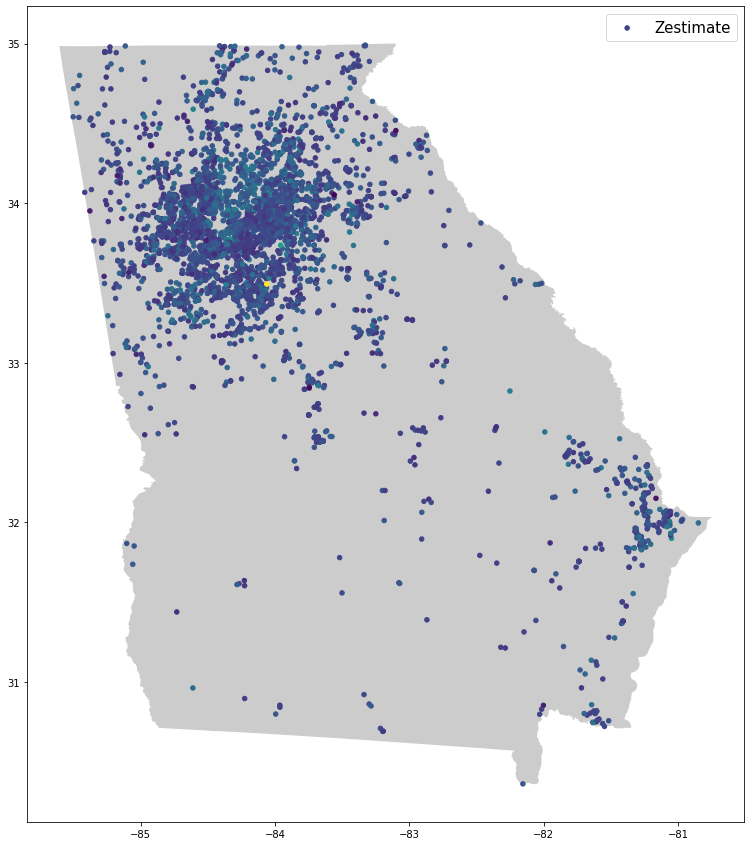

In [ ]:
fig,ax = plt.subplots(figsize =(15,15))
georgia_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_df.plot(column = 'zestimate', ax=ax, markersize = 20, marker = 'o', label = "Zestimate")
plt.legend(prop = {'size': 15})

In [ ]:
x = completed_data.loc[:, ['zip', 'latitude', 'longitude']]
x.head(10)

,zip,latitude,longitude
0,31548,30.804209,-81.653325
2,31558,30.767365,-81.588272
4,31558,30.746731,-81.633995
6,31548,30.791878,-81.676750
8,31565,31.104492,-81.604486
10,31558,30.750340,-81.608505
12,31548,30.819548,-81.607118
14,31548,30.815933,-81.604103
16,31565,31.018468,-81.559863
18,31569,30.856803,-81.643137


**Clustering GPS Coordinates**

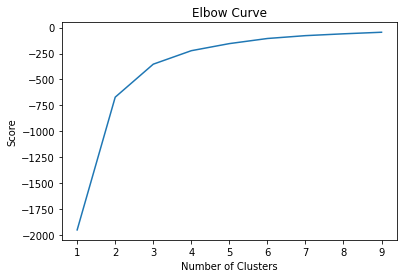

In [ ]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = completed_data[['latitude']]
X_axis = completed_data[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')

# Compute k-means clustering.
kmeans.fit(x[x.columns[1:3]]) 

x['cluster_label'] = kmeans.fit_predict(x[x.columns[1:3]])

# Coordinates of cluster centers.
centers = kmeans.cluster_centers_ 
# Labels of each point
labels = kmeans.predict(x[x.columns[1:3]]) 
x.head(10)

,zip,latitude,longitude,cluster_label
0,31548,30.804209,-81.653325,1
2,31558,30.767365,-81.588272,1
4,31558,30.746731,-81.633995,1
6,31548,30.791878,-81.676750,1
8,31565,31.104492,-81.604486,1
10,31558,30.750340,-81.608505,1
12,31548,30.819548,-81.607118,1
14,31548,30.815933,-81.604103,1
16,31565,31.018468,-81.559863,1
18,31569,30.856803,-81.643137,1


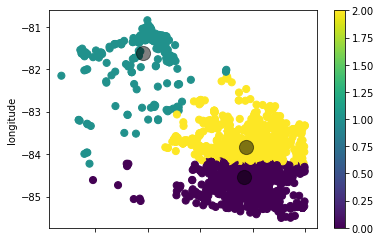

In [ ]:
x.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
x = x[['zip','cluster_label']]
x.head()

,zip,cluster_label
0,31548,1
2,31558,1
4,31558,1
6,31548,1
8,31565,1


In [ ]:
clustered_data = completed_data.merge(x, left_on='zip', right_on='zip')
clustered_data.head()

,zpid,rentZestimate,zestimate,livingArea,bathrooms,bedrooms,yearBuilt,address,city,state,...,RE_taxes,PP_taxes,Child_credit,Earned_Inc_credit,NOI,Expenses,cap_rate,total_appliances,total_community_feat,cluster_label
0,2064281489,2175.41,347514.0,2103.0,2.0,4.0,2020.0,101 College Street,Kingsland,Georgia,...,3.122857,0.676744,2.125743,2.585463,26104.92,8626.6212,0.051422,7.0,3.0,1
1,2064281489,2175.41,347514.0,2103.0,2.0,4.0,2020.0,101 College Street,Kingsland,Georgia,...,3.122857,0.676744,2.125743,2.585463,26104.92,8626.6212,0.051422,7.0,3.0,1
2,2064281489,2175.41,347514.0,2103.0,2.0,4.0,2020.0,101 College Street,Kingsland,Georgia,...,3.122857,0.676744,2.125743,2.585463,26104.92,8626.6212,0.051422,7.0,3.0,1
3,2064281489,2175.41,347514.0,2103.0,2.0,4.0,2020.0,101 College Street,Kingsland,Georgia,...,3.122857,0.676744,2.125743,2.585463,26104.92,8626.6212,0.051422,7.0,3.0,1
4,2064281489,2175.41,347514.0,2103.0,2.0,4.0,2020.0,101 College Street,Kingsland,Georgia,...,3.122857,0.676744,2.125743,2.585463,26104.92,8626.6212,0.051422,7.0,3.0,1


In [ ]:
clustered_data.columns

Index(['zpid', 'rentZestimate', 'zestimate', 'livingArea', 'bathrooms',
       'bedrooms', 'yearBuilt', 'address', 'city', 'state', 'zip', 'latitude',
       'longitude', 'square_footage', 'price_y', 'census_county_name', 'beds',
       'baths_full', 'year_built', 'propertyTaxRate', 'pricePerSquareFoot',
       'propertyTypeDimension', 'taxAnnualAmount', 'dateSold', 'pageViewCount',
       'hasAttachedProperty', 'poolFeatures', 'flooring', 'hasGarage',
       'parking', 'hasWaterfrontView', 'lotSize', 'appliances',
       'communityFeatures', 'propertyCondition', 'sch_rating_avg', 'sch_cnt',
       'sch_dist_avg', 'Individuals_taxed', 'Income_per_return', 'Cap_gain',
       'Pension', 'UE_claims', 'Social_security', 'SB_income',
       'Student_loan_ded', 'RE_taxes', 'PP_taxes', 'Child_credit',
       'Earned_Inc_credit', 'NOI', 'Expenses', 'cap_rate', 'total_appliances',
       'total_community_feat', 'cluster_label'],
      dtype='object')

In [ ]:
df_2 = clustered_data[['rentZestimate', 'address', 'city', 'zestimate', 'zip','latitude', 'longitude', 'cluster_label']]
crs = {'init':'epsg:4326'}
df_2.head()

,rentZestimate,address,city,zestimate,zip,latitude,longitude,cluster_label
0,2175.41,101 College Street,Kingsland,347514.0,31548,30.804209,-81.653325,1
1,2175.41,101 College Street,Kingsland,347514.0,31548,30.804209,-81.653325,1
2,2175.41,101 College Street,Kingsland,347514.0,31548,30.804209,-81.653325,1
3,2175.41,101 College Street,Kingsland,347514.0,31548,30.804209,-81.653325,1
4,2175.41,101 College Street,Kingsland,347514.0,31548,30.804209,-81.653325,1


In [ ]:

geometry = [Point(xy) for xy in zip (df_2['longitude'], df_2['latitude'])]
geometry[:3]

In [ ]:
geo_df_2 = gpd.GeoDataFrame(df_2, crs = crs, geometry = geometry)
geo_df_2.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,rentZestimate,address,city,zestimate,zip,latitude,longitude,cluster_label,geometry
0,2175.41,101 College Street,Kingsland,347514.0,31548,30.804209,-81.653325,1,POINT (-81.65332 30.80421)
1,2175.41,101 College Street,Kingsland,347514.0,31548,30.804209,-81.653325,1,POINT (-81.65332 30.80421)
2,2175.41,101 College Street,Kingsland,347514.0,31548,30.804209,-81.653325,1,POINT (-81.65332 30.80421)
3,2175.41,101 College Street,Kingsland,347514.0,31548,30.804209,-81.653325,1,POINT (-81.65332 30.80421)
4,2175.41,101 College Street,Kingsland,347514.0,31548,30.804209,-81.653325,1,POINT (-81.65332 30.80421)


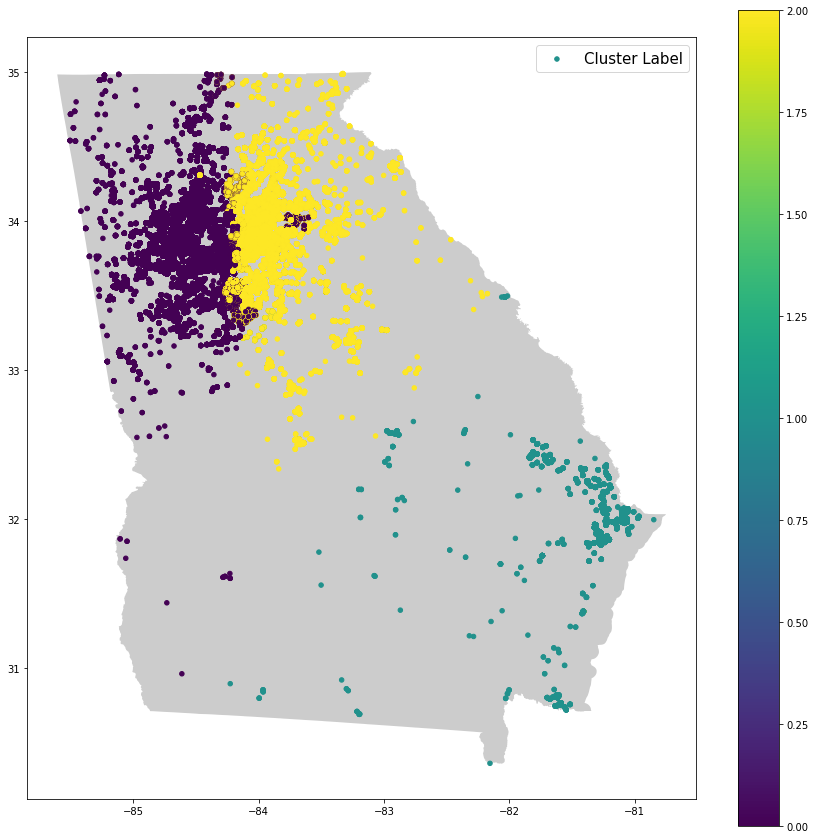

In [ ]:
fig,ax = plt.subplots(figsize =(15,15))
georgia_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_df_2.plot(column = 'cluster_label', ax=ax, markersize = 20, marker = 'o', legend = True, label = "Cluster Label")
plt.legend(prop = {'size': 15})

In [ ]:
clustered_data.cluster_label.value_counts()

0    65463
2    57554
1     4224
Name: cluster_label, dtype: int64

In [ ]:
df1 = clustered_data[clustered_data.cluster_label == 0]
df2 = clustered_data[clustered_data.cluster_label == 1]
df3 = clustered_data[clustered_data.cluster_label == 2]


**Random forest for clustered data**

In [ ]:
df1_numerical = df1.select_dtypes(include = ('int64', 'float64'))
df1_numerical.columns

Index(['zpid', 'rentZestimate', 'zestimate', 'livingArea', 'bathrooms',
       'bedrooms', 'yearBuilt', 'zip', 'latitude', 'longitude',
       'square_footage', 'price_y', 'beds', 'baths_full', 'year_built',
       'propertyTaxRate', 'pricePerSquareFoot', 'taxAnnualAmount',
       'pageViewCount', 'parking', 'sch_rating_avg', 'sch_cnt', 'sch_dist_avg',
       'Individuals_taxed', 'Income_per_return', 'Cap_gain', 'Pension',
       'UE_claims', 'Social_security', 'SB_income', 'Student_loan_ded',
       'RE_taxes', 'PP_taxes', 'Child_credit', 'Earned_Inc_credit', 'NOI',
       'Expenses', 'cap_rate', 'total_appliances', 'total_community_feat'],
      dtype='object')

In [ ]:
df1_numerical_features = df1_numerical.drop(['rentZestimate', 'zestimate', 'price_y'], axis =1)
df1_numerical_features = df1_numerical_features.fillna(0.0)
df1_numerical_features.columns


Index(['zpid', 'livingArea', 'bathrooms', 'bedrooms', 'yearBuilt', 'zip',
       'latitude', 'longitude', 'square_footage', 'beds', 'baths_full',
       'year_built', 'propertyTaxRate', 'pricePerSquareFoot',
       'taxAnnualAmount', 'pageViewCount', 'parking', 'sch_rating_avg',
       'sch_cnt', 'sch_dist_avg', 'Individuals_taxed', 'Income_per_return',
       'Cap_gain', 'Pension', 'UE_claims', 'Social_security', 'SB_income',
       'Student_loan_ded', 'RE_taxes', 'PP_taxes', 'Child_credit',
       'Earned_Inc_credit', 'NOI', 'Expenses', 'cap_rate', 'total_appliances',
       'total_community_feat'],
      dtype='object')

In [ ]:
price = df1_numerical.zestimate

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1_numerical_features, price, test_size=0.25, random_state=12)

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf.feature_importances_

array([1.99421731e-03, 3.91443638e-04, 4.04709793e-04, 7.23714635e-05,
       3.85290098e-04, 4.54621720e-04, 8.80532108e-03, 3.32909136e-03,
       2.16185284e-04, 6.88894022e-05, 6.33035314e-05, 4.23722344e-04,
       1.21588678e-01, 1.38056515e-03, 1.01926538e-01, 3.62168631e-04,
       2.04536346e-04, 2.95191200e-04, 3.97878264e-04, 5.99178051e-04,
       3.42784635e-04, 1.23791638e-03, 1.17414493e-04, 2.06251429e-04,
       3.95733131e-04, 3.18562703e-04, 2.62213934e-04, 3.60703663e-04,
       1.01598057e-04, 3.92075816e-03, 2.34751129e-04, 2.74066255e-04,
       1.08745773e-03, 7.33676376e-01, 1.35223787e-02, 3.85886040e-04,
       1.91245893e-04])

Text(0.5, 0, 'Random Forest Feature Importance')

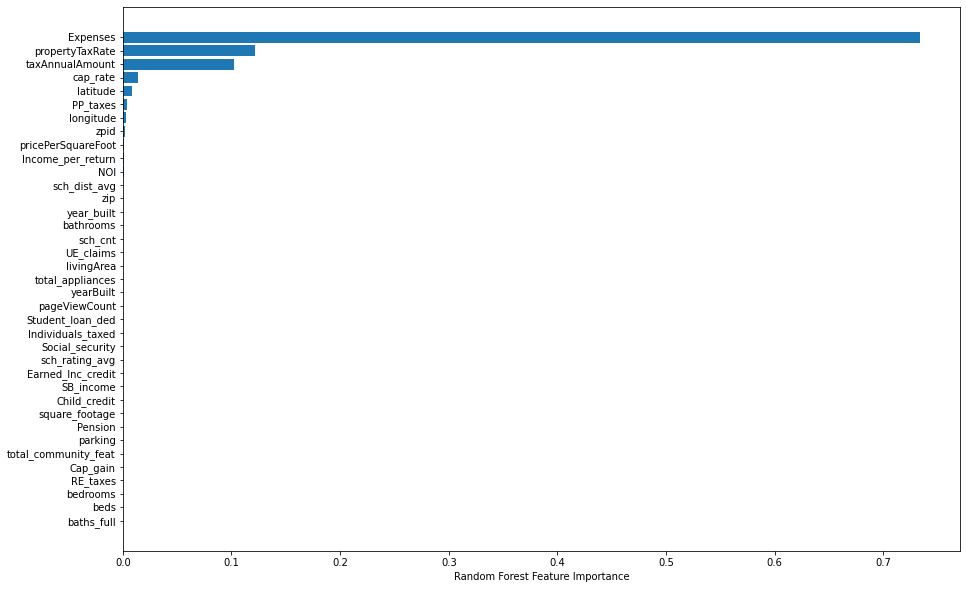

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(15, 10))
plt.barh(df1_numerical_features.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
completed_data[['latitude', 'longitude', 'city']]

,latitude,longitude,city
0,30.804209,-81.653325,Kingsland
2,30.767365,-81.588272,Saint Marys
4,30.746731,-81.633995,Saint Marys
6,30.791878,-81.676750,Kingsland
8,31.104492,-81.604486,Waverly
...,...,...,...
6511,33.954593,-82.705629,Tignall
6512,33.735060,-82.736249,Washington
6513,33.733582,-82.736407,Washington
6514,33.859142,-82.743826,Tignall


In [ ]:
map = folium.Map(location = [30.804209,	-81.653325], tiles='OpenStreetMap' , zoom_start = 9)
map